# Analysis of Arsenic Data
--

# Import Dependancies and Data files

In [1]:
#Import dependancies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import urllib.request

import time
from scipy.stats import linregress

In [2]:
#import datafile from CSV sample file and name as a variable (Should be the CSV file we downloaded from CA open data that Adam cleaned up)
ar_data_import = "../CA_Water_Analysis/Ar-Water-Lab-Data.csv"
ar_data = pd.read_csv(ar_data_import)


# Clean Data For Further Analysis

In [3]:
#Clean data by splitting combined date and time from sample_date field into a single date only field.
for idx, row in ar_data.iterrows(): 
    year=row['sample_date'].split(' ')[0].split('/')[-1]
    date=row['sample_date'].split(' ')[0]
    time=row['sample_date'].split(' ')[-1]
    new_date=date.split('/')[:-1]
    new_date=new_date+[f'{year}']
    new_date_str='/'.join(new_date)
    
    ar_data.loc[idx, 'sample_date']=new_date_str


# Isolate Time Segmented Data for further analysis

In [4]:


#convert sample date field to panda date format, print to check
ar_data['sample_date'] = pd.to_datetime(ar_data['sample_date'])

# Create DataFrame for 2012 to 2022
ar_data_df = pd.DataFrame(ar_data)
start_date = '2012-01-01'
end_date = '2022-12-31'
mask = (ar_data_df['sample_date'] > start_date) & (ar_data_df['sample_date'] <= end_date)
  
ar_data_df = ar_data_df.loc[mask]


ar_data_df.head()

,station_id,station_name,full_station_name,station_number,station_type,latitude,longitude,status,county_name,sample_code,sample_date,sample_depth,sample_depth_units,parameter,result,reporting_limit,units,method_name
52,259,Del Valle COW,Del Valle Conserv. Outlet Works,DV000000,Surface Water,37.6183,121.7494,Review Status Unknown,Alameda,D0122B0070,2022-01-18,1.0,Meters,Dissolved Arsenic,2.520,1.000,ug/L,EPA 200.8 (D)
53,259,Del Valle COW,Del Valle Conserv. Outlet Works,DV000000,Surface Water,37.6183,121.7494,Review Status Unknown,Alameda,D0122B0070,2022-01-18,1.0,Meters,Total Arsenic,2.470,1.000,ug/L,EPA 200.8 (T)
54,259,Del Valle COW,Del Valle Conserv. Outlet Works,DV000000,Surface Water,37.6183,121.7494,Review Status Unknown,Alameda,D0116B0008,2016-01-19,1.0,Meters,Dissolved Arsenic,0.004,0.001,mg/L,EPA 200.8 (D)
55,259,Del Valle COW,Del Valle Conserv. Outlet Works,DV000000,Surface Water,37.6183,121.7494,Review Status Unknown,Alameda,D0116B0008,2016-01-19,1.0,Meters,Total Arsenic,0.004,0.001,mg/L,EPA 200.8 (T)
56,259,Del Valle COW,Del Valle Conserv. Outlet Works,DV000000,Surface Water,37.6183,121.7494,Review Status Unknown,Alameda,DA0212B3393,2012-02-13,1.0,Meters,Dissolved Arsenic,0.001,0.001,mg/L,EPA 200.8 (D)


In [8]:
#count the number of results for the period
Total_Arsenic_Samples = ar_data_df.size

print(f"There were a total of {Total_Arsenic_Samples} Water Samples taken for Arsenic between 2012 and 2022")

There were a total of 190512 Water Samples taken for Arsenic between 2012 and 2022


# Ground Water vs. Surface Water Analysis

In [9]:
#create a list of stations, indexed by the type of station

stations_list = ar_data_df['station_type'].value_counts().index

s_list = []

for station in stations_list:
    #print(station)
    df = ar_data_df.loc[ar_data_df['station_type']==station]
    #print the number of datapoints by station type
    print(station,len(df))
    #print(len(df))

Surface Water 9629
Groundwater 862
Other 93


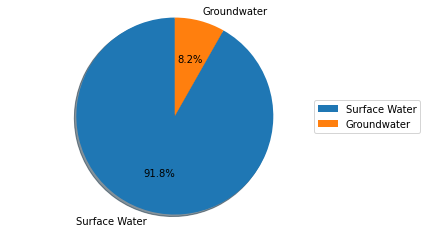

In [10]:
# Create pie chart to display samples by type of test for the period
labels = ['Surface Water', 'Groundwater']
sizes = [9629, 862]

# Pie Chart Plot
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # note: Equal aspect ratio ensures that pie is drawn as a circle

# Plot title on left
#plt.title("Arsenic 2012-2022", loc='left')

# Plot legend at the bottom
plt.legend(labels, loc='center left', bbox_to_anchor=(0.9, 0, 0.5, 1))

# Display the Pie Chart
plt.show()



In [11]:
#create a list of stations, indexed by the type of station

stations_list = ar_data_df['station_type'].value_counts().index

s_list = []

for station in stations_list:
    #print(station)
    df = ar_data_df.loc[ar_data_df['station_type']==station]
    #print the number of datapoints by station type
    #print(station,len(df))
    result = df["result"].nunique()
    print(stations_list)

Index(['Surface Water', 'Groundwater', 'Other'], dtype='object')
Index(['Surface Water', 'Groundwater', 'Other'], dtype='object')
Index(['Surface Water', 'Groundwater', 'Other'], dtype='object')


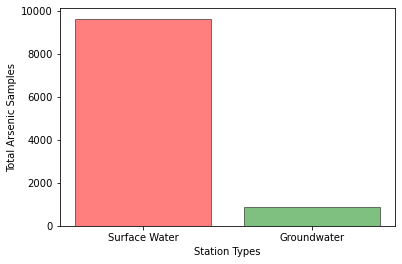

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Data
labels = ['Surface Water', 'Groundwater']
sizes = [9629, 862]

# Plotting as a Bar Chart
fig, ax = plt.subplots()
y_pos = np.arange(len(labels))
ax.bar(y_pos, sizes, align='center', alpha=0.5, color=['red', 'green', 'blue'], edgecolor='black')

# Title and X and Y Axis Labels
#plt.title("Water sources")
plt.xticks(y_pos, labels)
plt.xlabel("Station Types")
plt.ylabel("Total Arsenic Samples")

# Display the Stacked Bar Chart
plt.show()


# County by County Analysis

In [16]:
#create a list of countys, indexed by county

countys_list = ar_data_df['county_name'].value_counts().index

c_list = []

for county in countys_list:
    #print(county)
    df = ar_data_df.loc[ar_data_df['county_name']==county]
    #print the number of datapoints by county type
    print(county,len(df))
    #result = df["result"].nunique()
    #print(stations_list)


Butte 1144
Tehama 1010
Merced 995
Shasta 927
Kern 665
Alameda 586
Plumas 531
San Bernardino 483
Lake 455
San Joaquin 448
Contra Costa 373
Sacramento 340
Sutter 320
Modoc 318
Kings 273
Solano 254
Lassen 221
Yolo 211
Glenn 189
Colusa 165
Humboldt 146
Los Angeles 138
Siskiyou 80
Yuba 63
Riverside 62
Mendocino 46
Del Norte 36
Fresno 33
Trinity 18
Amador 16
Napa 15
Calaveras 9
Santa Clara 8
Sierra 4
San Luis Obispo 2
